In [2]:
import pandas as pd

# Replace 'YourUsername' with your actual system username
file_path = 'Titanic_modified.csv'

# Load the Titanic dataset
df = pd.read_csv(file_path)

In [3]:
df.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
count,1060.000000,1060.000000,1060,1060,957.000000,1060.000000,1060.000000,1060,1060.000000,955,1060.000000,10
unique,NaN,NaN,1015,2,NaN,NaN,NaN,1001,NaN,4,NaN,1
top,NaN,NaN,Outlier,male,NaN,NaN,NaN,XXX,NaN,Q,NaN,Z
freq,NaN,NaN,5,564,NaN,NaN,NaN,10,NaN,337,NaN,10
mean,503.664151,1.960377,NaN,NaN,38.394312,2.041509,2.001887,NaN,253.950482,NaN,0.498113,NaN
std,291.601495,0.822452,NaN,NaN,22.811025,1.421597,1.415547,NaN,148.869733,NaN,0.500232,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,10.020000,NaN,0.000000,NaN
25%,251.750000,1.000000,NaN,NaN,20.000000,1.000000,1.000000,NaN,130.935000,NaN,0.000000,NaN
50%,504.500000,2.000000,NaN,NaN,36.000000,2.000000,2.000000,NaN,249.505000,NaN,0.000000,NaN
75%,757.250000,3.000000,NaN,NaN,58.000000,3.000000,3.000000,NaN,367.337500,NaN,1.000000,NaN


In [4]:
# Check for missing values
missing_counts = df.isnull().sum()
missing_rows = df.isnull().sum(axis=1)

In [5]:
# Check for columns that are completely empty
empty_columns = missing_counts[missing_counts == len(df)].index
print("\nColumns that are completely empty:")
print(empty_columns)


Columns that are completely empty:
Index([], dtype='object')


In [6]:
# Display the number of rows with missing values
print("\nNumber of missing values per row:")
print(missing_rows.value_counts())


Number of missing values per row:
1    855
2    182
3     13
0     10
Name: count, dtype: int64


In [7]:
# Display the number of missing values in each column
print("Missing values per column:")
print(missing_counts)

Missing values per column:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             103
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked        105
Survived          0
Cabin          1050
dtype: int64


In [8]:
# Drop columns that are completely empty
df_cleaned = df.drop(columns=empty_columns)

In [9]:
print("\nColumns dropped due to being completely empty:")
print(empty_columns)


Columns dropped due to being completely empty:
Index([], dtype='object')


In [10]:
print("\nDataFrame after dropping empty columns:")
df_cleaned.describe(include='all')


DataFrame after dropping empty columns:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
count,1060.000000,1060.000000,1060,1060,957.000000,1060.000000,1060.000000,1060,1060.000000,955,1060.000000,10
unique,NaN,NaN,1015,2,NaN,NaN,NaN,1001,NaN,4,NaN,1
top,NaN,NaN,Outlier,male,NaN,NaN,NaN,XXX,NaN,Q,NaN,Z
freq,NaN,NaN,5,564,NaN,NaN,NaN,10,NaN,337,NaN,10
mean,503.664151,1.960377,NaN,NaN,38.394312,2.041509,2.001887,NaN,253.950482,NaN,0.498113,NaN
std,291.601495,0.822452,NaN,NaN,22.811025,1.421597,1.415547,NaN,148.869733,NaN,0.500232,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,10.020000,NaN,0.000000,NaN
25%,251.750000,1.000000,NaN,NaN,20.000000,1.000000,1.000000,NaN,130.935000,NaN,0.000000,NaN
50%,504.500000,2.000000,NaN,NaN,36.000000,2.000000,2.000000,NaN,249.505000,NaN,0.000000,NaN
75%,757.250000,3.000000,NaN,NaN,58.000000,3.000000,3.000000,NaN,367.337500,NaN,1.000000,NaN


In [11]:
# Work with cleaned DataFrame
df_imputed = df_cleaned.copy() 

In [12]:
# Impute missing values for non-empty columns
for column in df_imputed.columns:
    if df_imputed[column].isnull().sum() > 0:
        if df_imputed[column].dtype == 'object':
            # Impute with mode for categorical columns
            mode_value = df_imputed[column].mode().iloc[0]
            df_imputed[column] = df_imputed[column].fillna(mode_value)
        else:
            # Impute with mean for numerical columns
            mean_value = df_imputed[column].mean()
            df_imputed[column] = df_imputed[column].fillna(mean_value)

In [13]:
print("\nDataFrame after imputing missing values:")
df_imputed.describe(include='all')


DataFrame after imputing missing values:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
count,1060.000000,1060.000000,1060,1060,1060.000000,1060.000000,1060.000000,1060,1060.000000,1060,1060.000000,1060
unique,NaN,NaN,1015,2,NaN,NaN,NaN,1001,NaN,4,NaN,1
top,NaN,NaN,Outlier,male,NaN,NaN,NaN,XXX,NaN,Q,NaN,Z
freq,NaN,NaN,5,564,NaN,NaN,NaN,10,NaN,442,NaN,1060
mean,503.664151,1.960377,NaN,NaN,38.394312,2.041509,2.001887,NaN,253.950482,NaN,0.498113,NaN
std,291.601495,0.822452,NaN,NaN,21.673336,1.421597,1.415547,NaN,148.869733,NaN,0.500232,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,10.020000,NaN,0.000000,NaN
25%,251.750000,1.000000,NaN,NaN,21.000000,1.000000,1.000000,NaN,130.935000,NaN,0.000000,NaN
50%,504.500000,2.000000,NaN,NaN,38.394312,2.000000,2.000000,NaN,249.505000,NaN,0.000000,NaN
75%,757.250000,3.000000,NaN,NaN,55.539919,3.000000,3.000000,NaN,367.337500,NaN,1.000000,NaN


In [14]:
# Identify duplicate rows
print("\nDuplicate rows:")
df_imputed[df_imputed.duplicated(keep='first')]


Duplicate rows:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
1000,584,1,Denise Martinez,male,55.000000,4,4,57d52b78-9cf3-437e-b562-037b78aa16ea,282.72,Q,1,Z
1001,882,3,Denise Brown,male,23.000000,0,3,bd03d33b-eee9-495e-a308-6e48e4e5b5b0,393.39,C,0,Z
1002,896,2,Ryan Murphy,male,39.000000,3,4,abdce0da-be0b-4ddd-b8f9-500169bd40d8,293.40,C,1,Z
1003,297,2,Laura Haney,female,49.000000,0,3,638e1388-8faf-4d4a-a5a9-9ebcbe0ec2da,310.27,C,1,Z
1005,921,3,Russell Murphy,female,14.000000,3,3,8be15610-b234-4948-a4f2-ae4cf016716b,215.01,Q,0,Z
1008,221,1,Courtney Mills,male,24.000000,3,0,02fb2869-0df8-4b89-9ce7-eed1fcdfe961,412.28,Q,1,Z
1011,570,1,Michael Johnson,female,2.000000,3,4,4654e77d-de67-4278-9313-b3a7e5a1c6e4,341.42,S,1,Z
1013,515,1,Angelica Parker,male,38.394312,3,1,b9787c4b-09aa-4570-9be9-50c7147d7bfc,168.92,C,1,Z
1016,630,2,Kevin Davis,female,60.000000,4,2,0dc78104-8c66-4766-b922-b440e0f1e44c,319.87,C,1,Z
1017,363,2,Bryan Gomez,male,53.000000,3,0,80b9ec30-ed94-498b-9b92-3c67129538df,338.84,C,0,Z


In [15]:
# Handle duplicates
df_final = df_imputed.drop_duplicates()

In [16]:
print("\nNumber of duplicate rows removed:")
print(len(df_imputed) - len(df_final))


Number of duplicate rows removed:
32


In [17]:
print("\nDataFrame after removing duplicates:")
df_final.describe(include='all')


DataFrame after removing duplicates:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
count,1028.000000,1028.000000,1028,1028,1028.000000,1028.000000,1028.000000,1028,1028.000000,1028,1028.000000,1028
unique,NaN,NaN,1015,2,NaN,NaN,NaN,1001,NaN,4,NaN,1
top,NaN,NaN,Outlier,male,NaN,NaN,NaN,XXX,NaN,Q,NaN,Z
freq,NaN,NaN,5,542,NaN,NaN,NaN,10,NaN,428,NaN,1028
mean,503.998054,1.969844,NaN,NaN,38.407381,2.035019,2.007782,NaN,253.847598,NaN,0.492218,NaN
std,291.599424,0.819709,NaN,NaN,21.744679,1.426805,1.411435,NaN,149.779728,NaN,0.500183,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,10.020000,NaN,0.000000,NaN
25%,251.750000,1.000000,NaN,NaN,21.000000,1.000000,1.000000,NaN,129.835000,NaN,0.000000,NaN
50%,502.500000,2.000000,NaN,NaN,38.394312,2.000000,2.000000,NaN,248.480000,NaN,0.000000,NaN
75%,756.250000,3.000000,NaN,NaN,56.000000,3.000000,3.000000,NaN,368.430000,NaN,1.000000,NaN


In [18]:
# Handle outliers

# Function to identify outliers in a column
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [19]:
# Identify and display potential outliers for each numerical column
for column in df_final.select_dtypes(include=['float64', 'int64']).columns:
    outliers = identify_outliers(df_final, column)
    if not outliers.empty:
        print(f"\nPotential outliers in column '{column}':")
        print(outliers[[column]])


Potential outliers in column 'Fare':
            Fare
1050  892.996971
1051  988.672870
1052  961.818904
1053  901.906935
1055  876.352064
1057  851.639306
1058  759.447843
1059  751.706673


In [20]:
# Remove outliers
df_no_outliers = df_final.copy()  # Work with DataFrame after removing duplicates

for column in df_no_outliers.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

In [21]:
print("\nNumber of rows before and after outlier removal:")
print("Before:", len(df_final))
print("After:", len(df_no_outliers))


Number of rows before and after outlier removal:
Before: 1028
After: 1020


In [22]:
print("\nDataFrame after handling outliers:")
df_no_outliers.describe(include='all')


DataFrame after handling outliers:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
count,1020.000000,1020.000000,1020,1020,1020.000000,1020.000000,1020.000000,1020,1020.000000,1020,1020.000000,1020
unique,NaN,NaN,1013,2,NaN,NaN,NaN,1001,NaN,4,NaN,1
top,NaN,NaN,Elizabeth Mendez,male,NaN,NaN,NaN,865a7766-ad8c-4fea-9e4b-061eb45e9463,NaN,Q,NaN,Z
freq,NaN,NaN,2,538,NaN,NaN,NaN,2,NaN,425,NaN,1020
mean,500.065686,1.966667,NaN,NaN,38.306543,2.035294,2.011765,NaN,248.990970,NaN,0.491176,NaN
std,289.324543,0.821011,NaN,NaN,21.708983,1.425524,1.409299,NaN,139.737519,NaN,0.500167,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,10.020000,NaN,0.000000,NaN
25%,249.750000,1.000000,NaN,NaN,21.000000,1.000000,1.000000,NaN,127.832500,NaN,0.000000,NaN
50%,498.500000,2.000000,NaN,NaN,38.394312,2.000000,2.000000,NaN,246.785000,NaN,0.000000,NaN
75%,750.250000,3.000000,NaN,NaN,55.250000,3.000000,3.000000,NaN,367.055000,NaN,1.000000,NaN


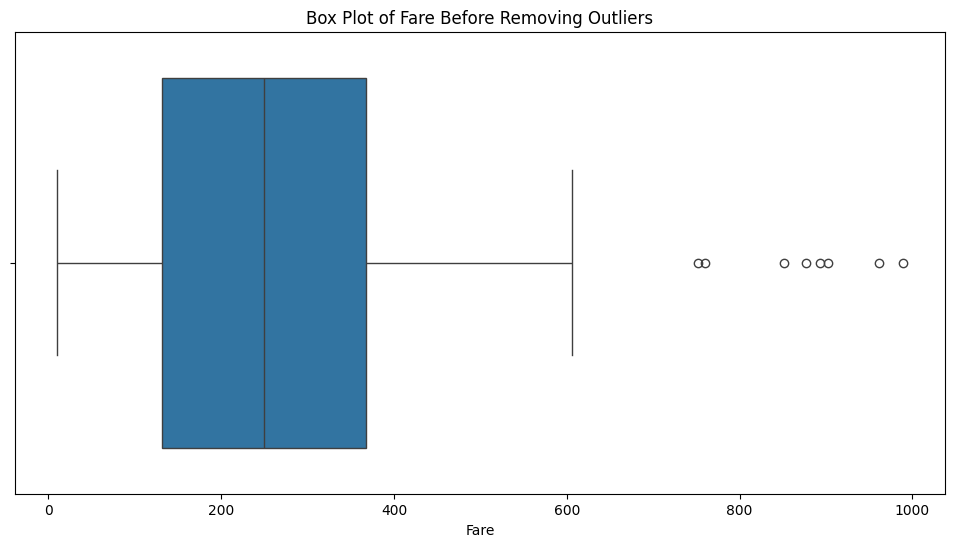

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_imputed['Fare'])
plt.title('Box Plot of Fare Before Removing Outliers')
plt.xlabel('Fare')
plt.show()

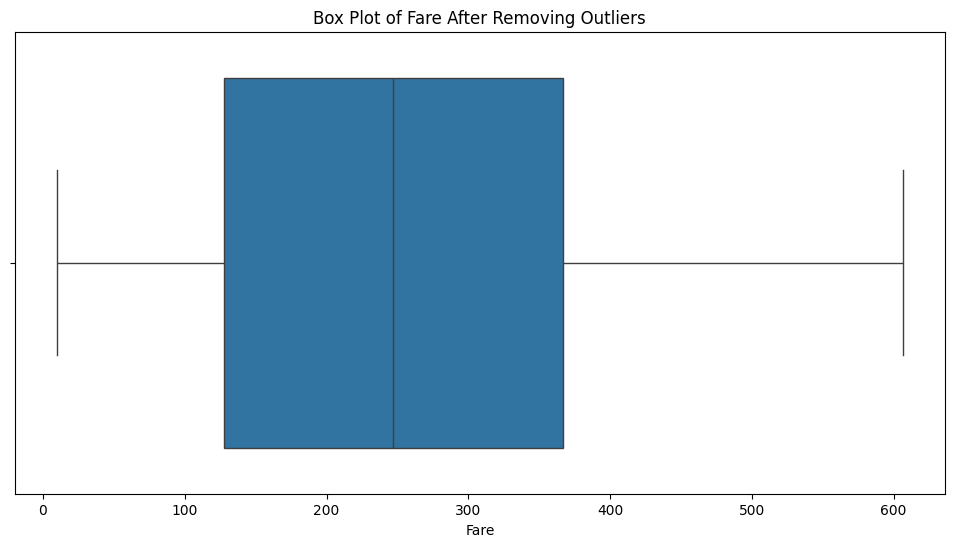

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_no_outliers['Fare'])
plt.title('Box Plot of Fare After Removing Outliers')
plt.xlabel('Fare')
plt.show()

In [25]:
df_no_outliers.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,500.065686,1.966667,38.306543,2.035294,2.011765,248.990970,0.491176
std,289.324543,0.821011,21.708983,1.425524,1.409299,139.737519,0.500167
min,1.000000,1.000000,1.000000,0.000000,0.000000,10.020000,0.000000
25%,249.750000,1.000000,21.000000,1.000000,1.000000,127.832500,0.000000
50%,498.500000,2.000000,38.394312,2.000000,2.000000,246.785000,0.000000
75%,750.250000,3.000000,55.250000,3.000000,3.000000,367.055000,1.000000
max,1007.000000,3.000000,79.000000,4.000000,4.000000,606.281039,1.000000


In [27]:
from sklearn.preprocessing import StandardScaler
# Standardization (z-score normalization)
scaler = StandardScaler()
df_standardized = df_no_outliers.copy()

# Apply standardization to numerical columns
numerical_columns = df_standardized.select_dtypes(include=['float64', 'int64']).columns
df_standardized[numerical_columns] = scaler.fit_transform(df_standardized[numerical_columns])

In [28]:
# Display the standardized DataFrame
print("\nDataFrame after standardization:")
df_standardized.describe()


DataFrame after standardization:


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1020.000000,1.020000e+03,1.020000e+03,1.020000e+03,1020.000000,1.020000e+03,1.020000e+03
mean,0.000000,1.602204e-16,-2.159493e-16,9.926700e-17,0.000000,9.578395e-18,-2.438137e-17
std,1.000491,1.000491e+00,1.000491e+00,1.000491e+00,1.000491,1.000491e+00,1.000491e+00
min,-1.725780,-1.177987e+00,-1.719327e+00,-1.428452e+00,-1.428194,-1.710981e+00,-9.825059e-01
25%,-0.865597,-1.177987e+00,-7.975976e-01,-7.266113e-01,-0.718273,-8.674686e-01,-9.825059e-01
50%,-0.005414,4.062025e-02,4.044972e-03,-2.477084e-02,-0.008352,-1.579427e-02,-9.825059e-01
75%,0.865143,1.259228e+00,7.808643e-01,6.770696e-01,0.701569,8.453130e-01,1.017806e+00
max,1.752990,1.259228e+00,1.875418e+00,1.378910e+00,1.411490,2.558120e+00,1.017806e+00


In [29]:
df_standardized.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
0,-1.725780,1.259228,Allison Hill,male,-0.981944,1.378910,-0.008352,43d75413-a939-4bd1-a516-b0d47d3572cc,-0.751140,Q,1.017806,Z
1,-1.722322,-1.177987,Noah Rhodes,male,0.999775,-0.024771,-0.008352,6334fa2a-8b4b-47e7-a451-5ae01754bf08,0.000351,S,-0.982506,Z
2,-1.718864,1.259228,Angie Henderson,male,1.184121,-1.428452,-1.428194,61a66444-e2af-4629-9efb-336e2f546033,-1.422513,Q,1.017806,Z
3,-1.715406,1.259228,DANIEL WAGNER,male,-0.152387,1.378910,-1.428194,0b6c03c8-721e-4419-afc3-e6495e911b91,-0.098740,C,1.017806,Z
4,-1.711948,-1.177987,Cristian Santos,female,1.460640,-1.428452,0.701569,436e3c49-770e-49db-b092-d40143675d58,-0.635939,C,1.017806,Z


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Normalization (min-max scaling)
normalizer = MinMaxScaler()
df_normalized = df_no_outliers.copy()

# Apply normalization to numerical columns
df_normalized[numerical_columns] = normalizer.fit_transform(df_normalized[numerical_columns])

In [31]:
# Display the normalized DataFrame
print("\nDataFrame after normalization:")
df_normalized.describe(include='all')


DataFrame after normalization:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
count,1020.000000,1020.000000,1020,1020,1020.000000,1020.000000,1020.000000,1020,1020.000000,1020,1020.000000,1020
unique,NaN,NaN,1013,2,NaN,NaN,NaN,1001,NaN,4,NaN,1
top,NaN,NaN,Elizabeth Mendez,male,NaN,NaN,NaN,865a7766-ad8c-4fea-9e4b-061eb45e9463,NaN,Q,NaN,Z
freq,NaN,NaN,2,538,NaN,NaN,NaN,2,NaN,425,NaN,1020
mean,0.496089,0.483333,NaN,NaN,0.478289,0.508824,0.502941,NaN,0.400782,NaN,0.491176,NaN
std,0.287599,0.410506,NaN,NaN,0.278320,0.356381,0.352325,NaN,0.234356,NaN,0.500167,NaN
min,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN
25%,0.247266,0.000000,NaN,NaN,0.256410,0.250000,0.250000,NaN,0.197585,NaN,0.000000,NaN
50%,0.494533,0.500000,NaN,NaN,0.479414,0.500000,0.500000,NaN,0.397083,NaN,0.000000,NaN
75%,0.744781,1.000000,NaN,NaN,0.695513,0.750000,0.750000,NaN,0.598790,NaN,1.000000,NaN


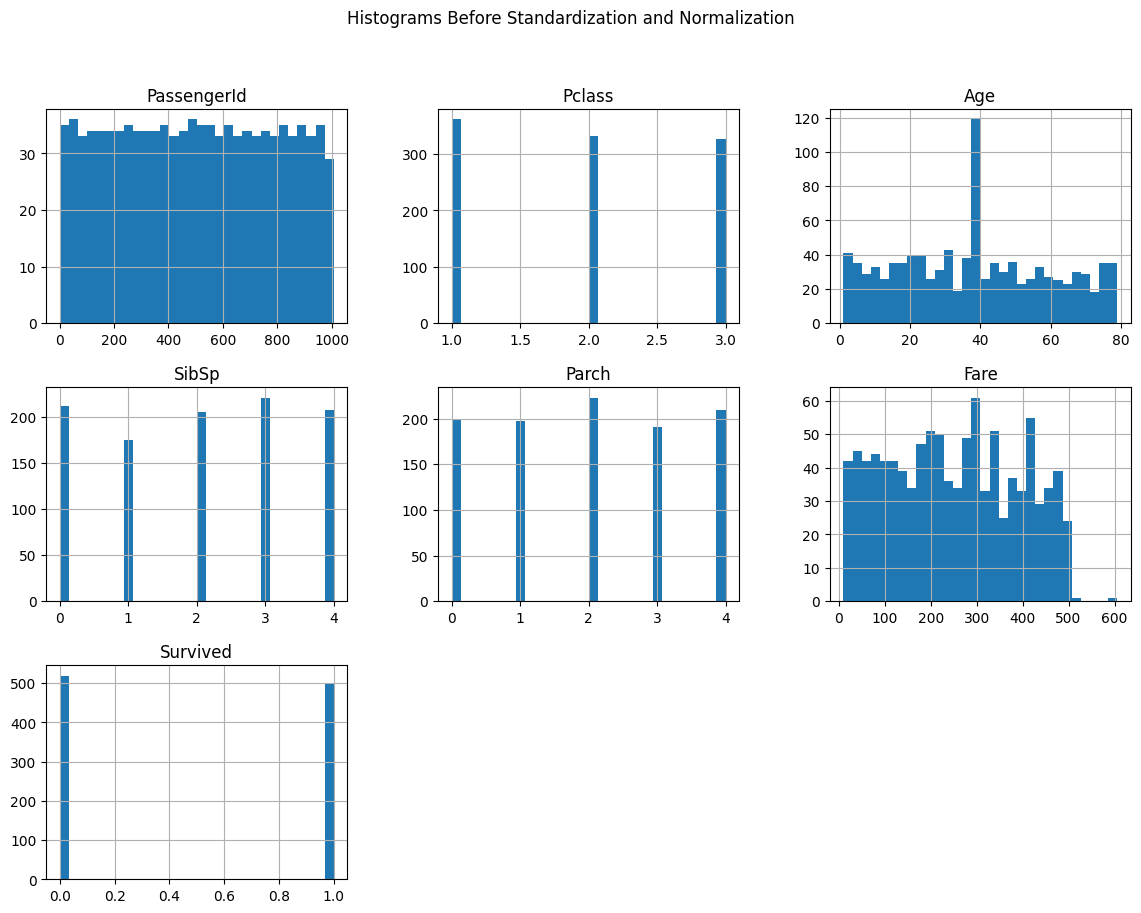

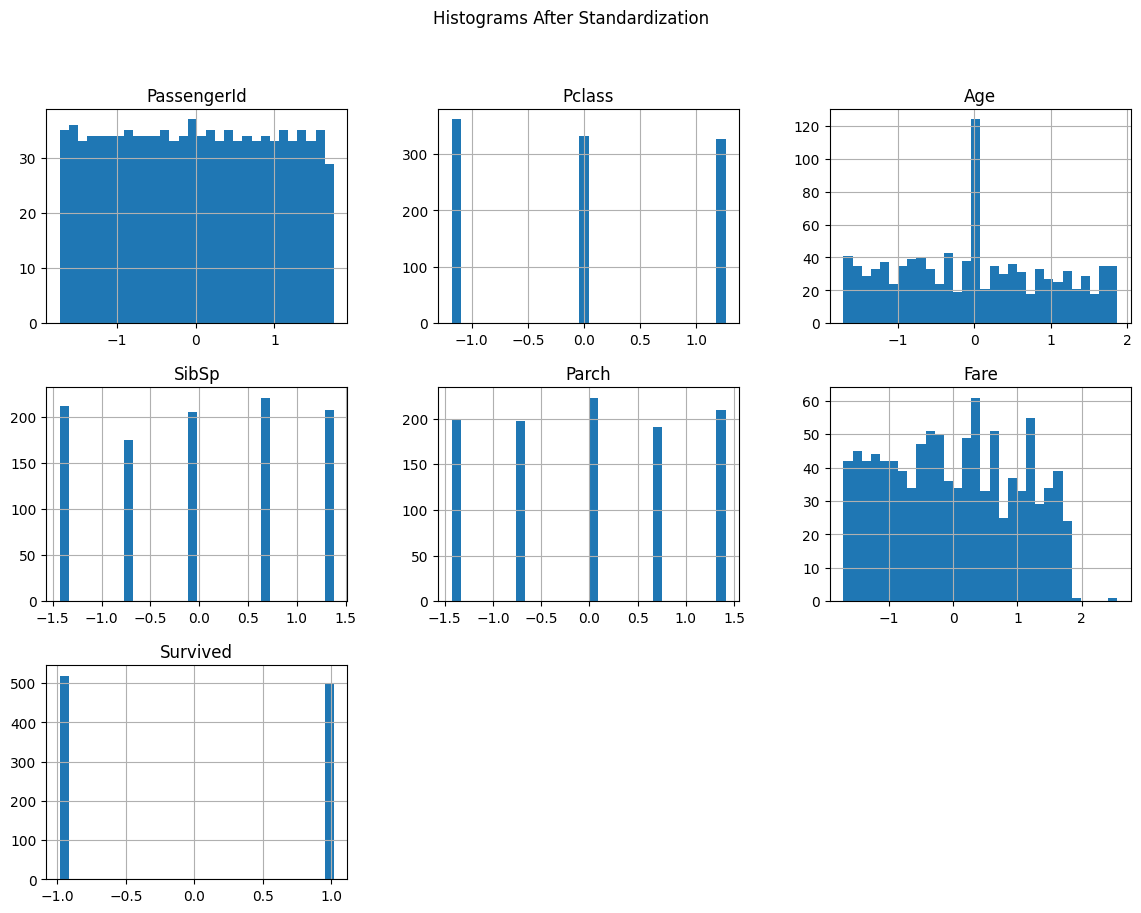

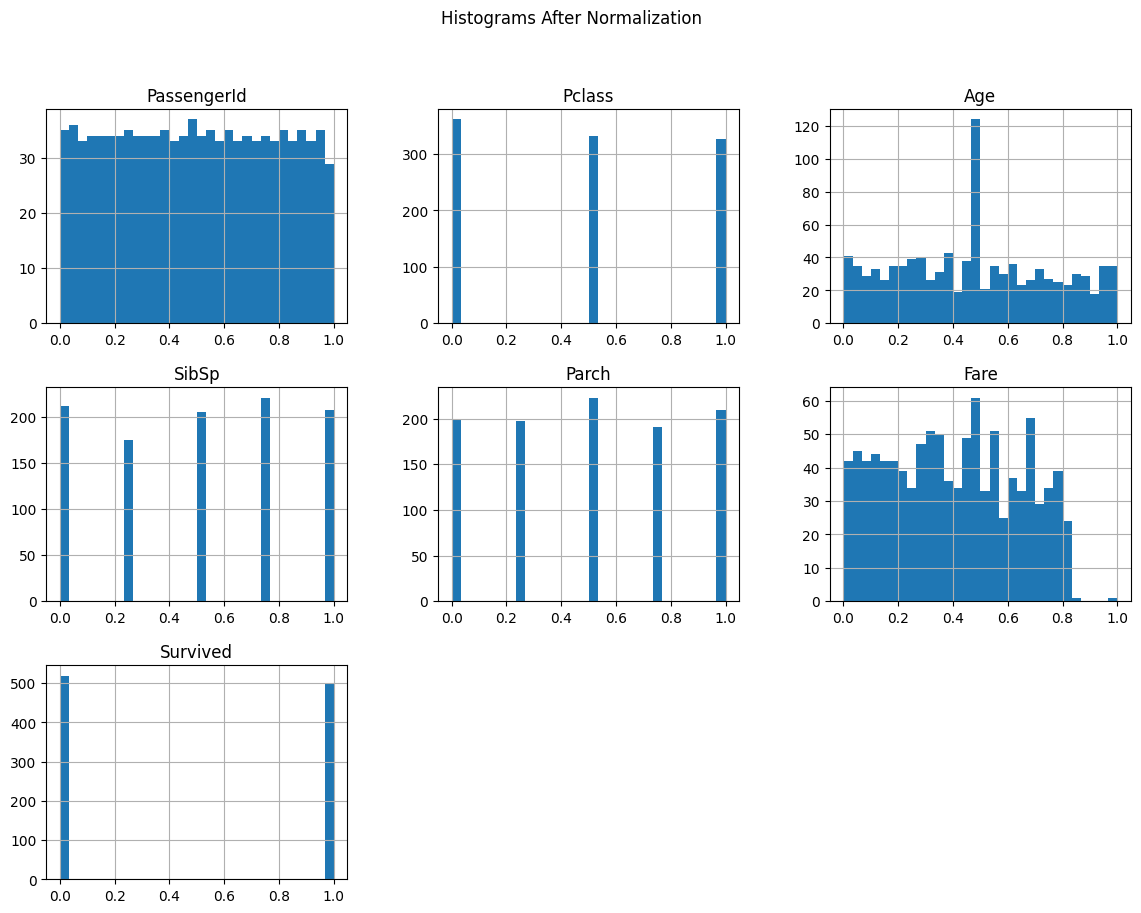

In [32]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
def plot_histograms(df, title):
    df.hist(bins=30, figsize=(14, 10))
    plt.suptitle(title)
    plt.show()

plot_histograms(df_no_outliers, 'Histograms Before Standardization and Normalization')
plot_histograms(df_standardized, 'Histograms After Standardization')
plot_histograms(df_normalized, 'Histograms After Normalization')


In [33]:
# Identify the current data types
print("Data types before conversion:")
df_standardized.dtypes

Data types before conversion:


PassengerId    float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Embarked        object
Survived       float64
Cabin           object
dtype: object

In [34]:
# Convert any date columns to datetime (if applicable)
# Replace 'date_column' with actual date column name if applicable
if 'date_column' in df_standardized.columns:
    df_standardized['date_column'] = pd.to_datetime(df_standardized['date_column'], errors='coerce')


In [35]:
# Convert categorical columns to 'category' data type
# Assuming 'Sex', 'Embarked', and 'Cabin' are categorical columns
categorical_columns = ['Sex', 'Embarked', 'Cabin']
for column in categorical_columns:
    if column in df_standardized.columns:
        df_standardized[column] = df_standardized[column].astype('category')

In [36]:
# Convert numerical columns that might have been converted to objects back to numeric
for column in df_standardized.select_dtypes(include=['object']).columns:
    df_standardized[column] = pd.to_numeric(df_standardized[column], errors='coerce')

In [37]:
# Verify the data types after conversion
print("\nData types after conversion:")
df_standardized.dtypes


Data types after conversion:


PassengerId     float64
Pclass          float64
Name            float64
Sex            category
Age             float64
SibSp           float64
Parch           float64
Ticket          float64
Fare            float64
Embarked       category
Survived        float64
Cabin          category
dtype: object

In [38]:
print("Before Text Normalization:")
df_standardized[['Name', 'Ticket']].head()

Before Text Normalization:


,Name,Ticket
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [39]:
# Text Normalization: Strip leading/trailing spaces and convert to lowercase for textual columns
# Ensure the 'Name' and 'Ticket' columns are converted to strings before applying text normalization
df_standardized['Name'] = df_standardized['Name'].astype(str).str.strip().str.lower()
df_standardized['Ticket'] = df_standardized['Ticket'].astype(str).str.strip().str.lower()

In [40]:
# Verify changes
print("\nText Normalization for 'Name' and 'Ticket':")
df_standardized[['Name', 'Ticket']].head()


Text Normalization for 'Name' and 'Ticket':


,Name,Ticket
0,nan,nan
1,nan,nan
2,nan,nan
3,nan,nan
4,nan,nan


In [41]:
# Display original values of 'Sex', 'Embarked', and 'Cabin' columns before encoding
print("Before Encoding:")
df_standardized[['Sex', 'Embarked', 'Cabin']].head()

Before Encoding:


,Sex,Embarked,Cabin
0,male,Q,Z
1,male,S,Z
2,male,Q,Z
3,male,C,Z
4,female,C,Z


In [42]:
# Apply One-Hot Encoding for 'Sex', 'Embarked', and 'Cabin' columns
df_one_hot_encoded = pd.get_dummies(df_standardized, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)

# Identify new columns added by One-Hot Encoding
new_columns = [col for col in df_one_hot_encoded.columns if col not in df_standardized.columns]

# Display the new columns and their content
print("\nNew Columns after One-Hot Encoding and their content:")
df_one_hot_encoded[new_columns].head()


New Columns after One-Hot Encoding and their content:


,Sex_male,Embarked_Q,Embarked_S,Embarked_X
0,True,True,False,False
1,True,False,True,False
2,True,True,False,False
3,True,False,False,False
4,False,False,False,False


In [43]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for 'Sex', 'Embarked', and 'Cabin' columns
label_encoders = {}
for column in categorical_columns:
    if column in df_standardized.columns:
        le = LabelEncoder()
        df_standardized[column] = le.fit_transform(df_standardized[column].astype(str))
        label_encoders[column] = le  # Save label encoders for potential use later

# Display the columns after encoding
print("\nAfter Label Encoding:")
df_standardized[categorical_columns].head()



After Label Encoding:


,Sex,Embarked,Cabin
0,1,1,0
1,1,2,0
2,1,1,0
3,1,0,0
4,0,0,0


In [44]:
# List of columns to drop
columns_to_drop = ['Name', 'Ticket', 'Cabin']  # Modify this list based on your specific needs

# Drop the unnecessary columns
df_cleaned = df_standardized.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print("\nData after dropping unnecessary columns:")
df_cleaned.describe(include = 'all')


Data after dropping unnecessary columns:


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1020.000000,1.020000e+03,1020.000000,1.020000e+03,1.020000e+03,1020.000000,1.020000e+03,1020.000000,1.020000e+03
mean,0.000000,1.602204e-16,0.527451,-2.159493e-16,9.926700e-17,0.000000,9.578395e-18,1.074510,-2.438137e-17
std,1.000491,1.000491e+00,0.499491,1.000491e+00,1.000491e+00,1.000491,1.000491e+00,0.846593,1.000491e+00
min,-1.725780,-1.177987e+00,0.000000,-1.719327e+00,-1.428452e+00,-1.428194,-1.710981e+00,0.000000,-9.825059e-01
25%,-0.865597,-1.177987e+00,0.000000,-7.975976e-01,-7.266113e-01,-0.718273,-8.674686e-01,0.000000,-9.825059e-01
50%,-0.005414,4.062025e-02,1.000000,4.044972e-03,-2.477084e-02,-0.008352,-1.579427e-02,1.000000,-9.825059e-01
75%,0.865143,1.259228e+00,1.000000,7.808643e-01,6.770696e-01,0.701569,8.453130e-01,2.000000,1.017806e+00
max,1.752990,1.259228e+00,1.000000,1.875418e+00,1.378910e+00,1.411490,2.558120e+00,3.000000,1.017806e+00


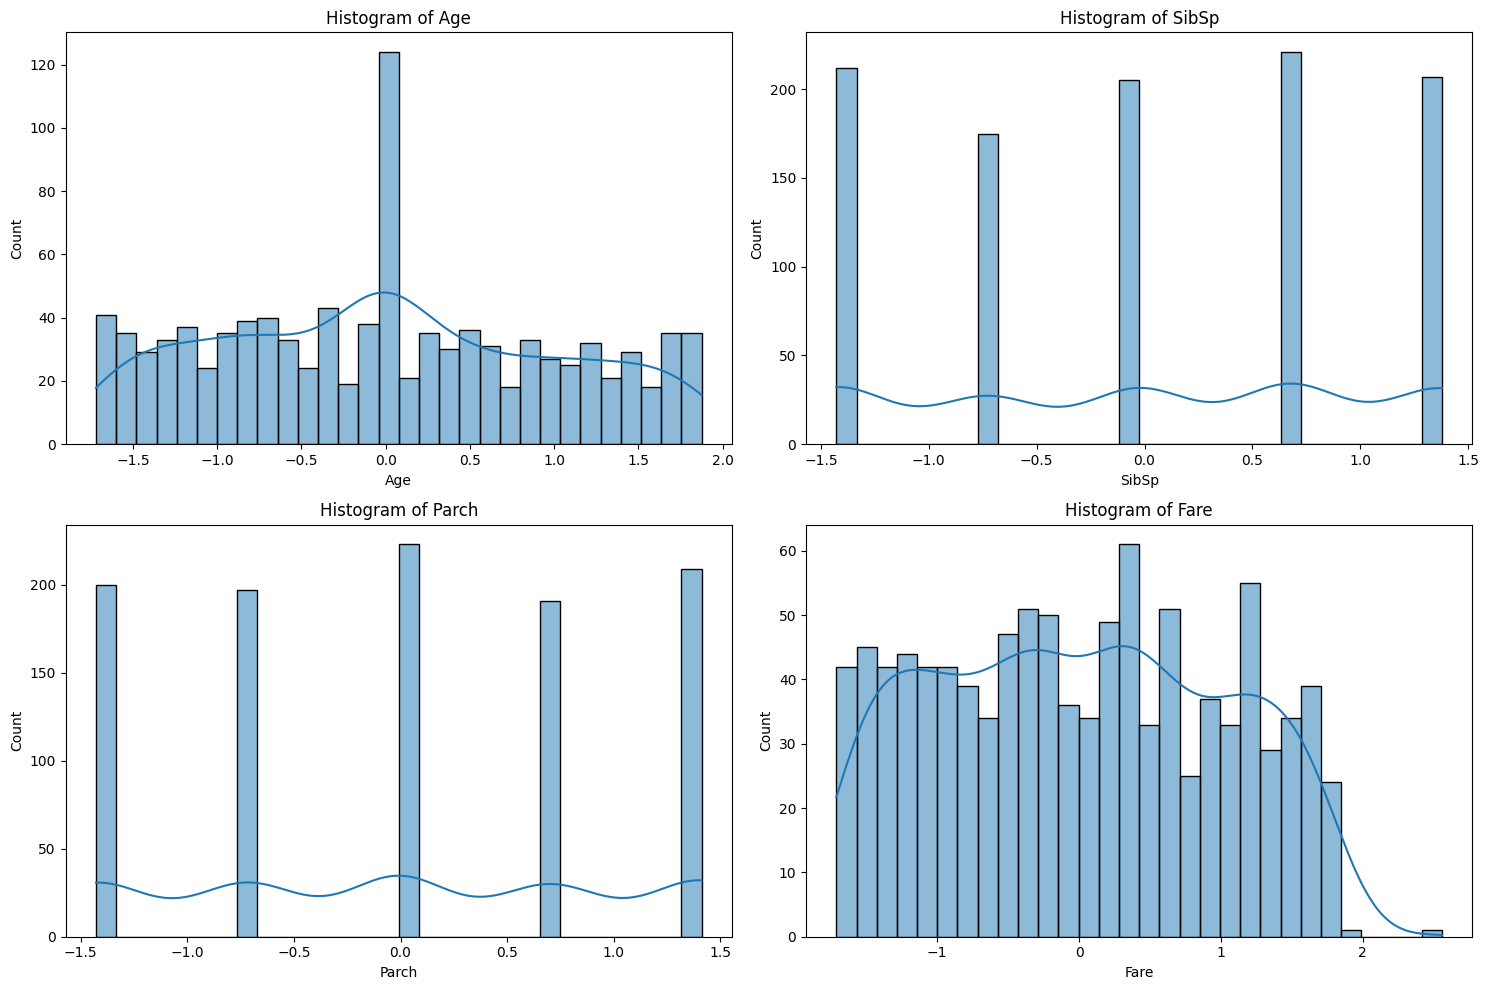

In [45]:
#Histogram: For Continuous Numerical Data
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for histogram
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

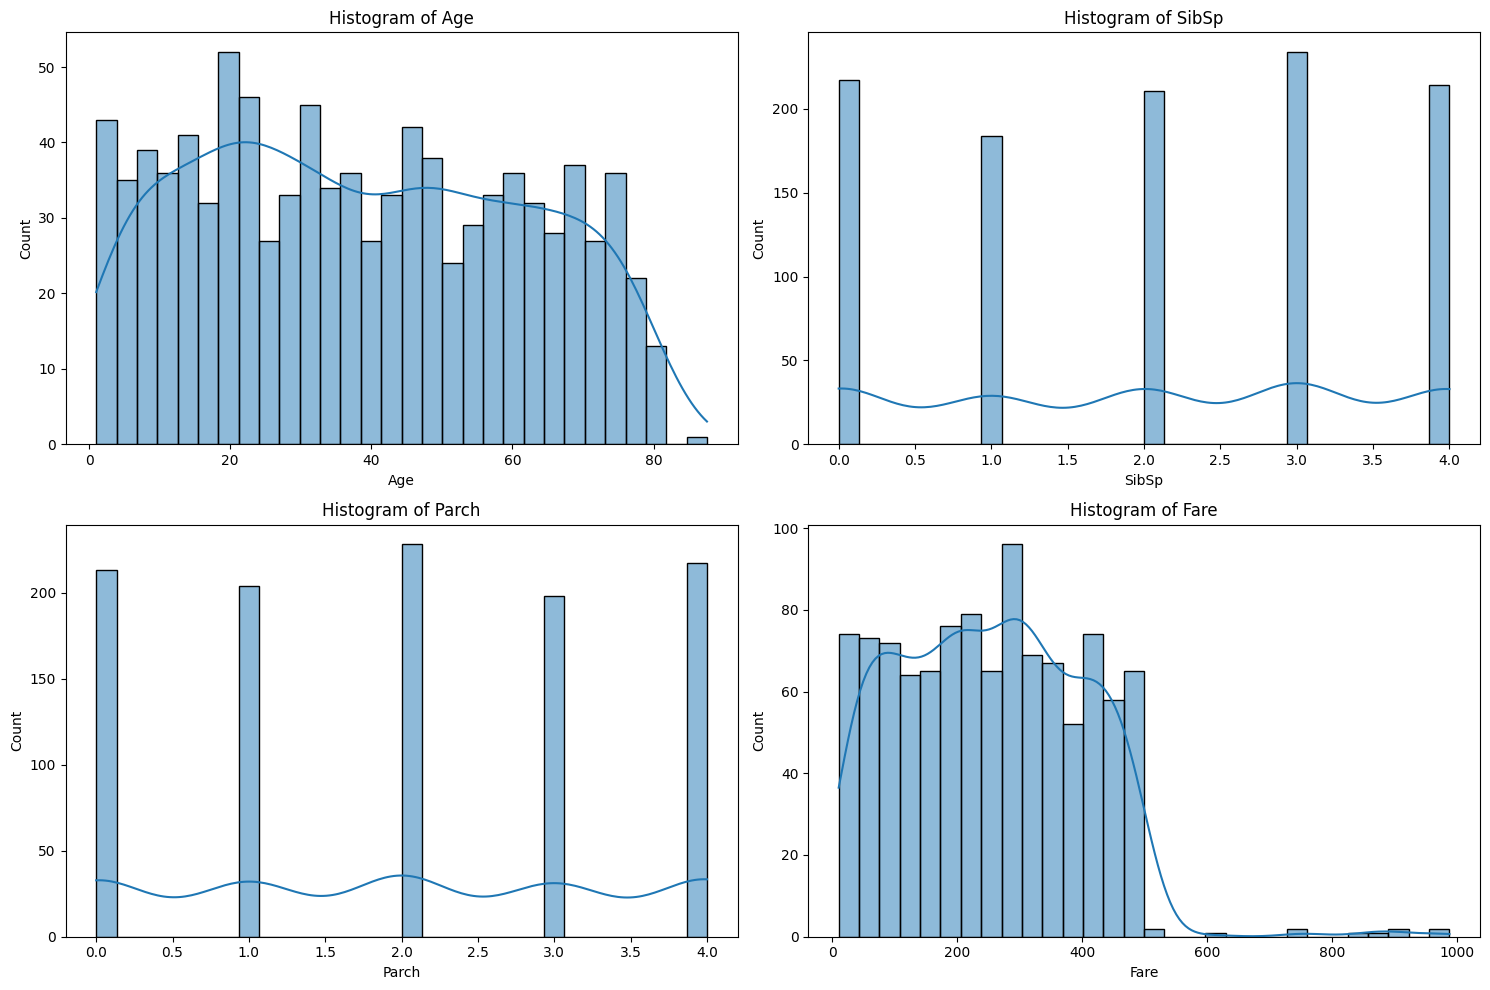

In [46]:
#Histogram: For Continuous Numerical Data - BEFORE DATA CLEANING
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for histogram
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

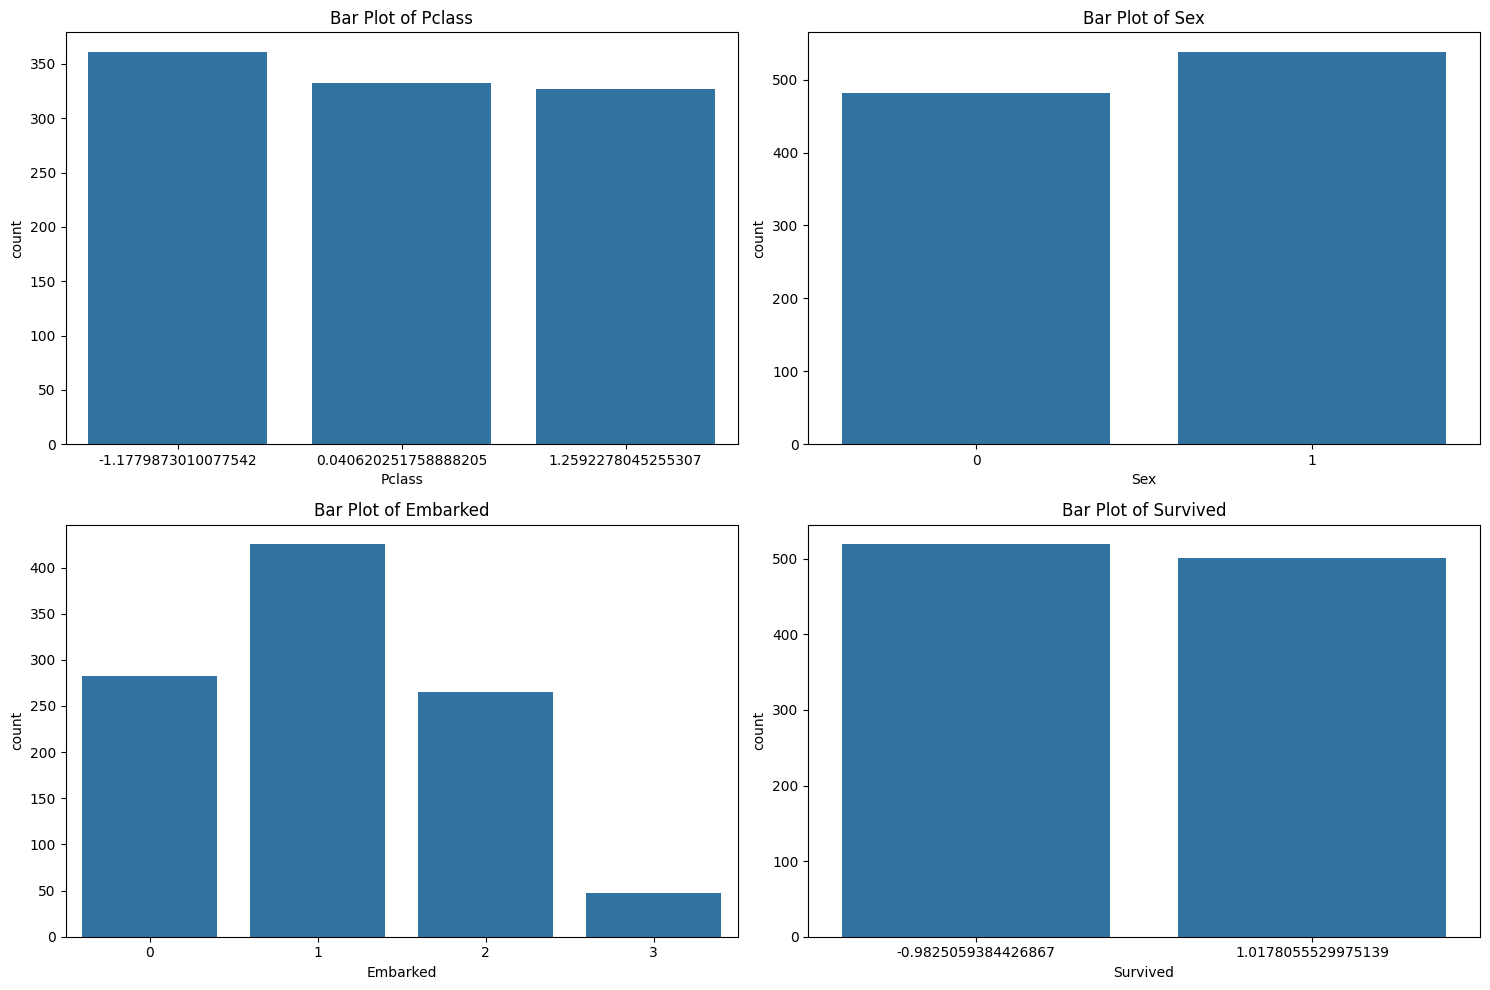

In [47]:
#Bar Plot: For Categorical Data
plt.figure(figsize=(15, 10))
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Survived']

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df_cleaned[column])
    plt.title(f'Bar Plot of {column}')

plt.tight_layout()
plt.show()

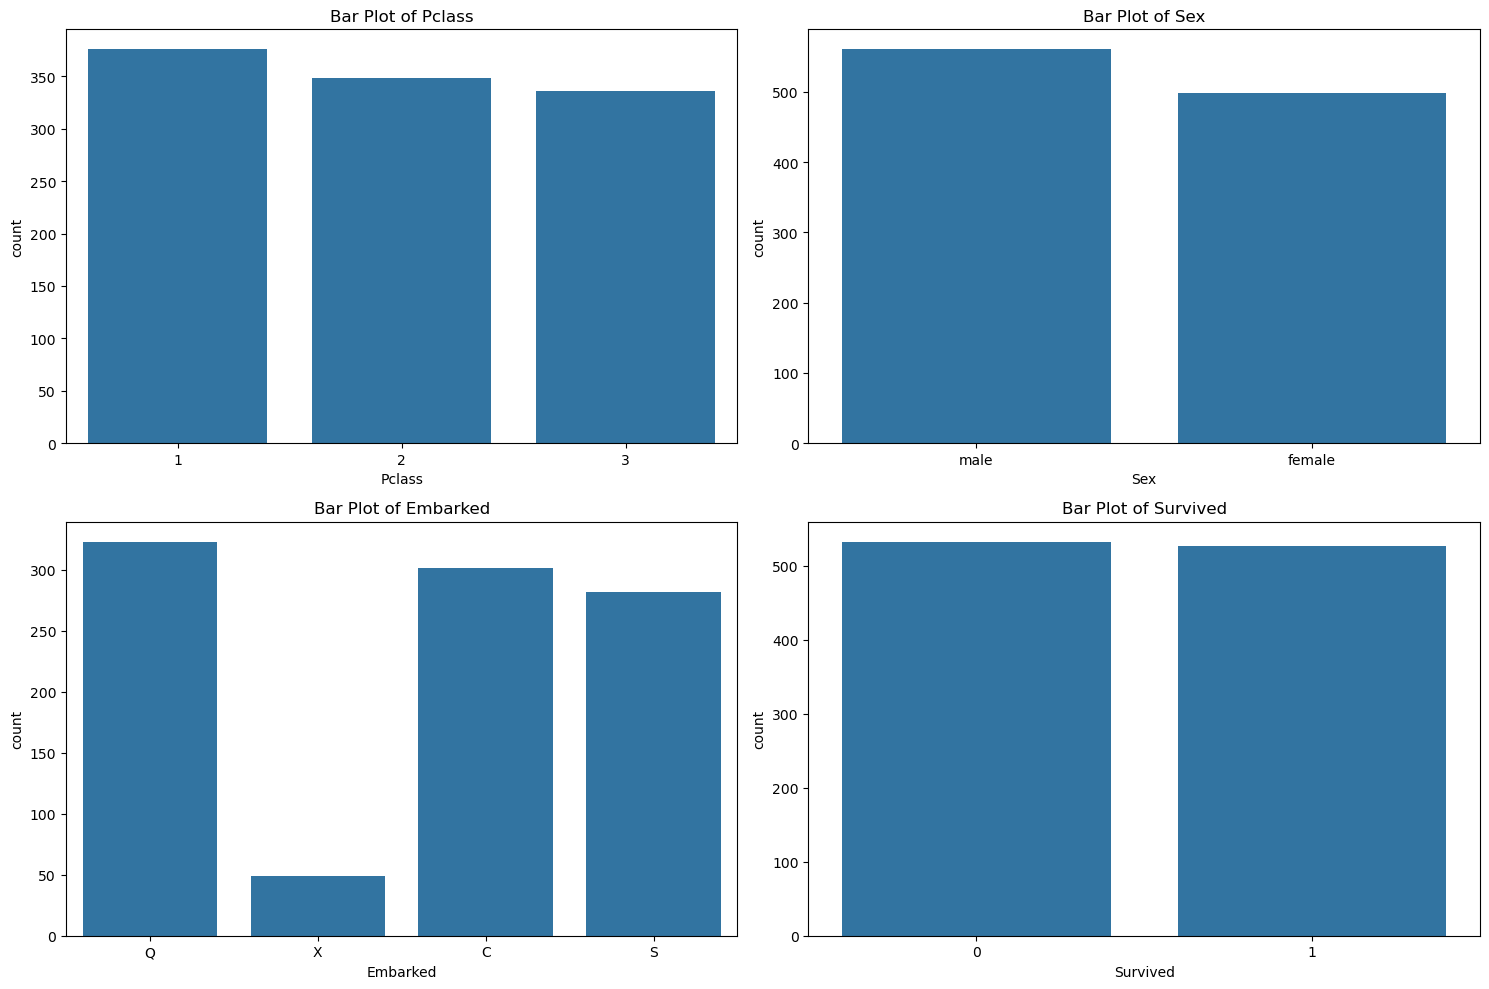

In [361]:
#Bar Plot: For Categorical Data - BEFORE DATA CLEANING
plt.figure(figsize=(15, 10))
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Survived']

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[column])
    plt.title(f'Bar Plot of {column}')

plt.tight_layout()
plt.show()

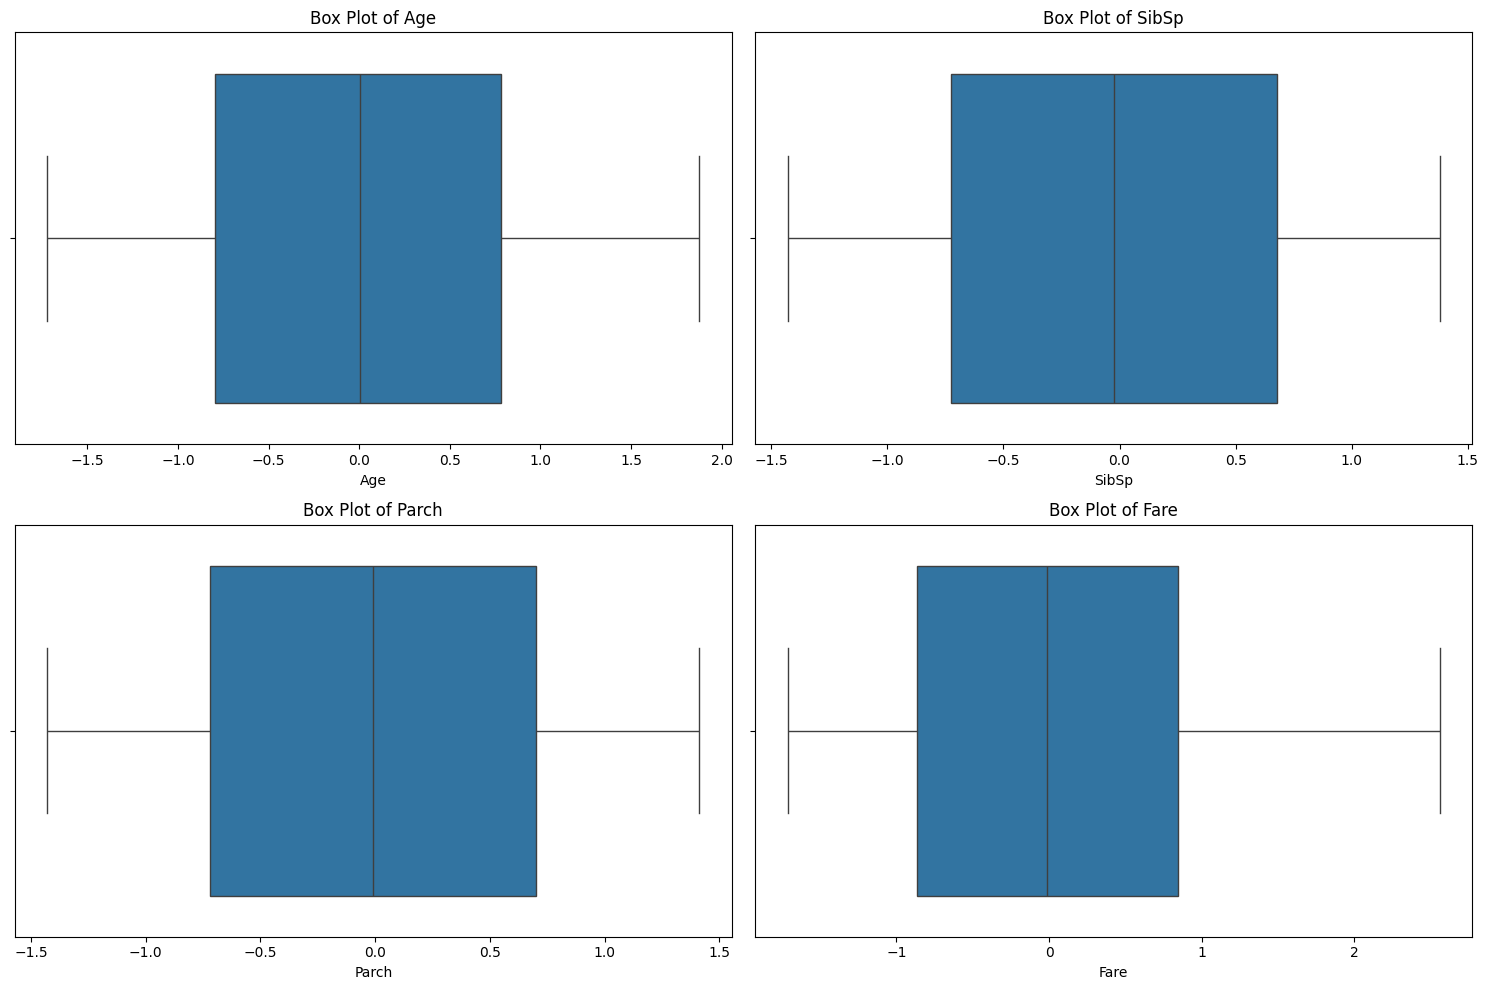

In [48]:
#Box Plot: To Visualize Distribution and Detect Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


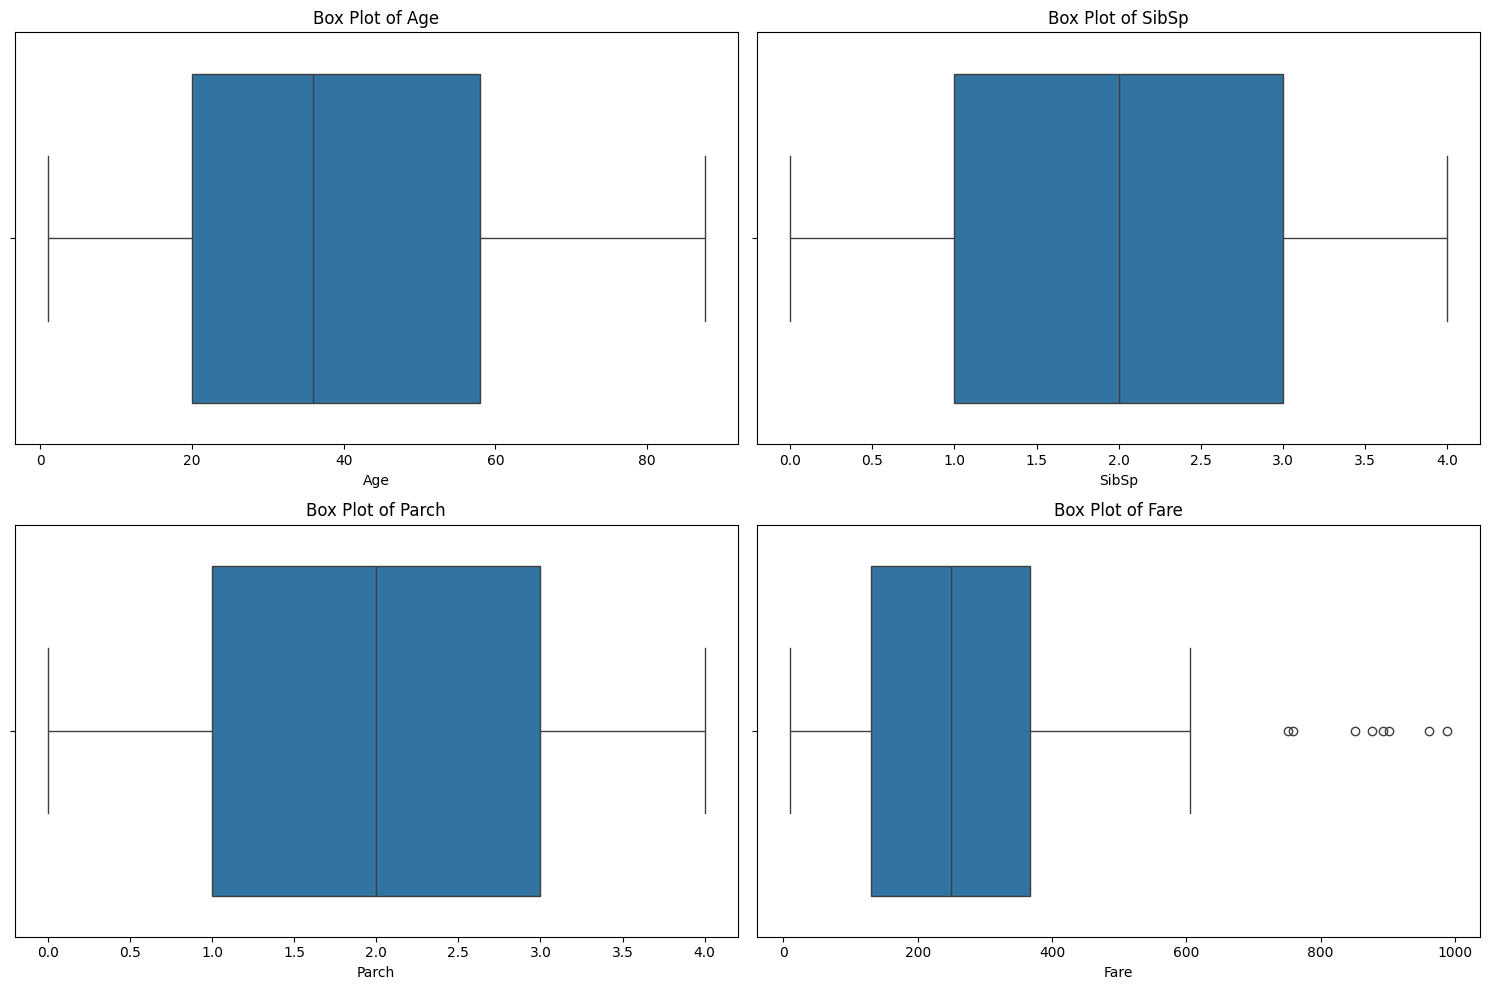

In [49]:
#Box Plot: To Visualize Distribution and Detect Outliers - BEFORE DATA CLEANING 
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

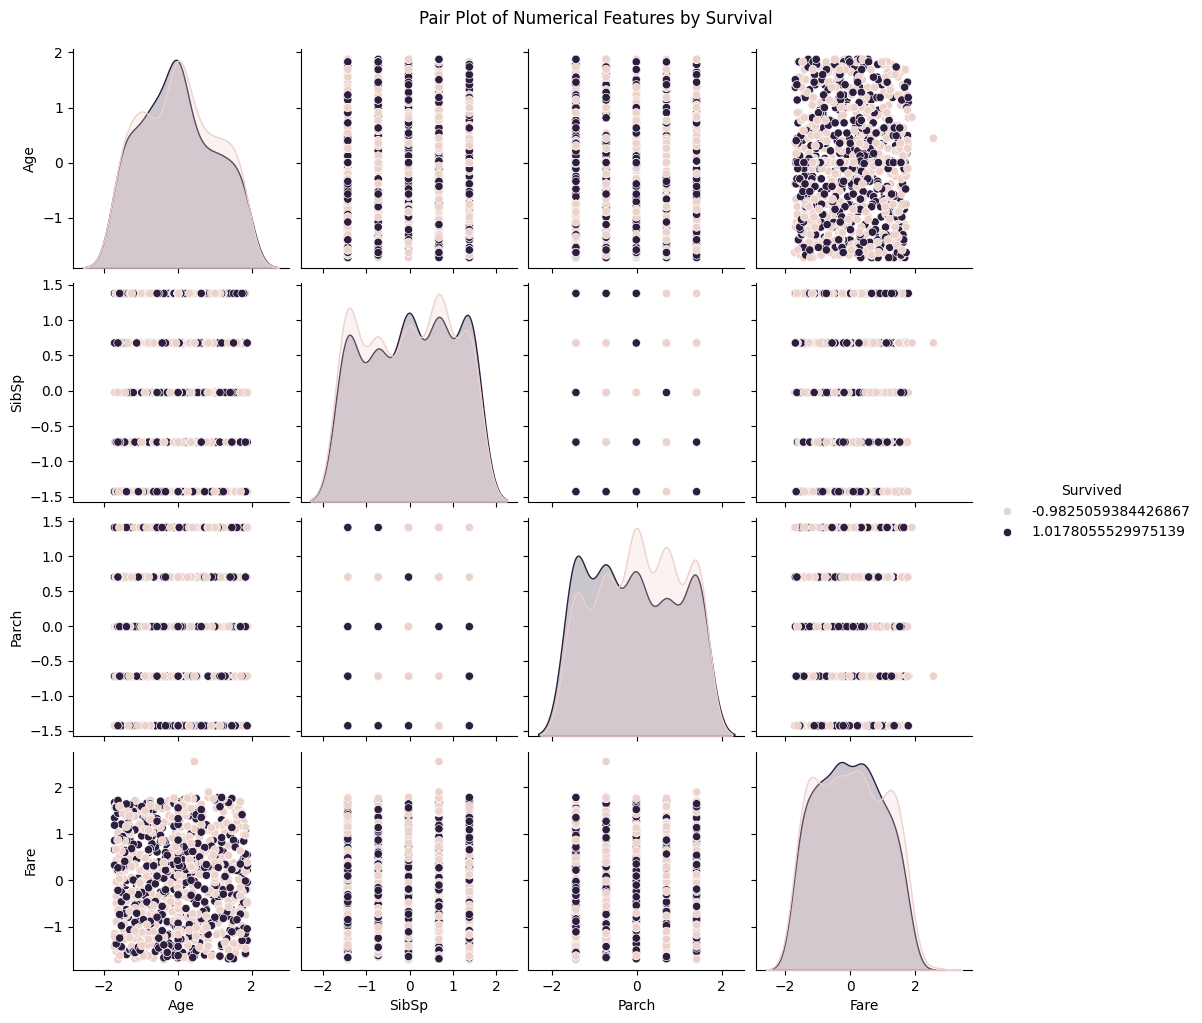

In [50]:
#Pair Plot: To Visualize Pairwise Relationships
import seaborn as sns

# Pair plot for numerical columns
sns.pairplot(df_cleaned[numerical_columns + ['Survived']], hue='Survived')
plt.suptitle('Pair Plot of Numerical Features by Survival', y=1.02)
plt.show()

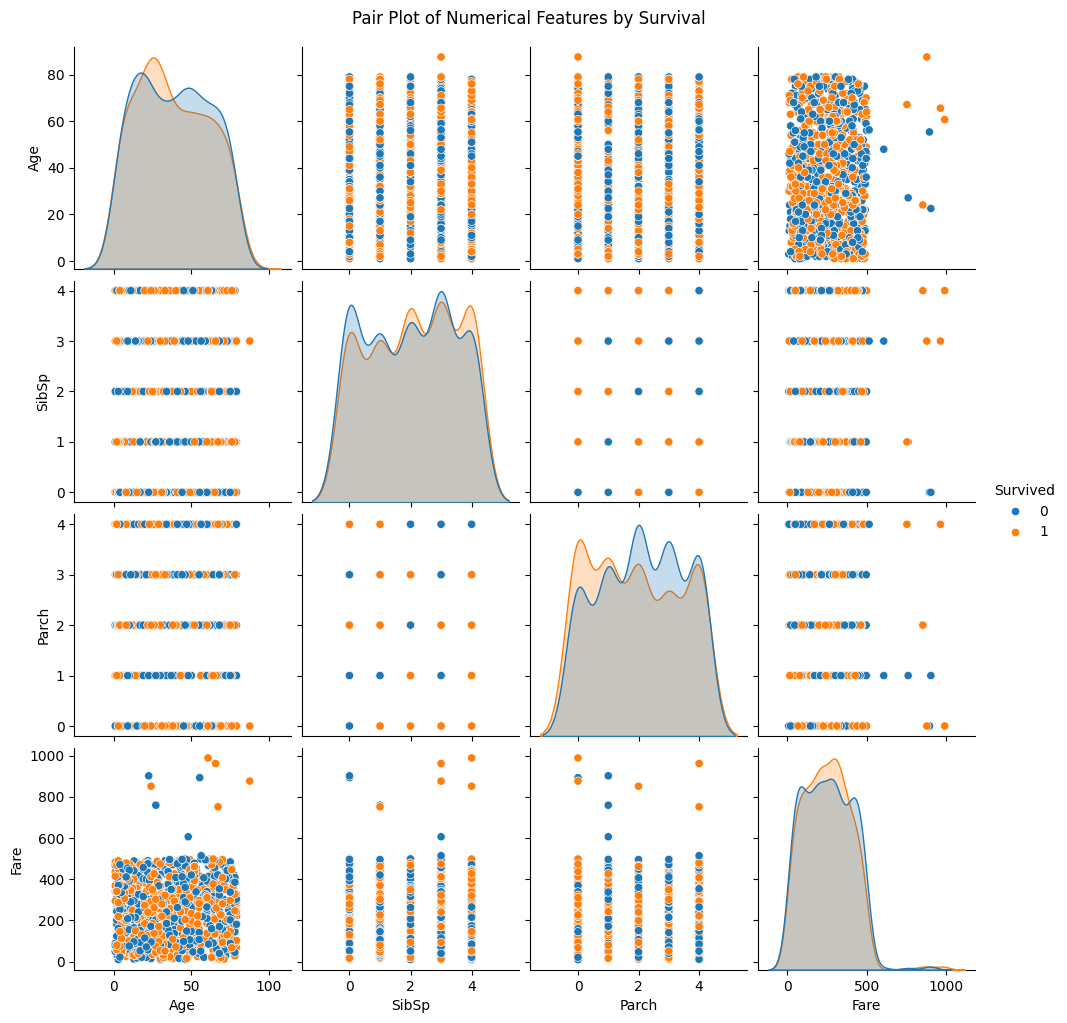

In [51]:
#Pair Plot: To Visualize Pairwise Relationships - BEFORE DATA CLEANING
import seaborn as sns

# Pair plot for numerical columns
sns.pairplot(df[numerical_columns + ['Survived']], hue='Survived')
plt.suptitle('Pair Plot of Numerical Features by Survival', y=1.02)
plt.show()

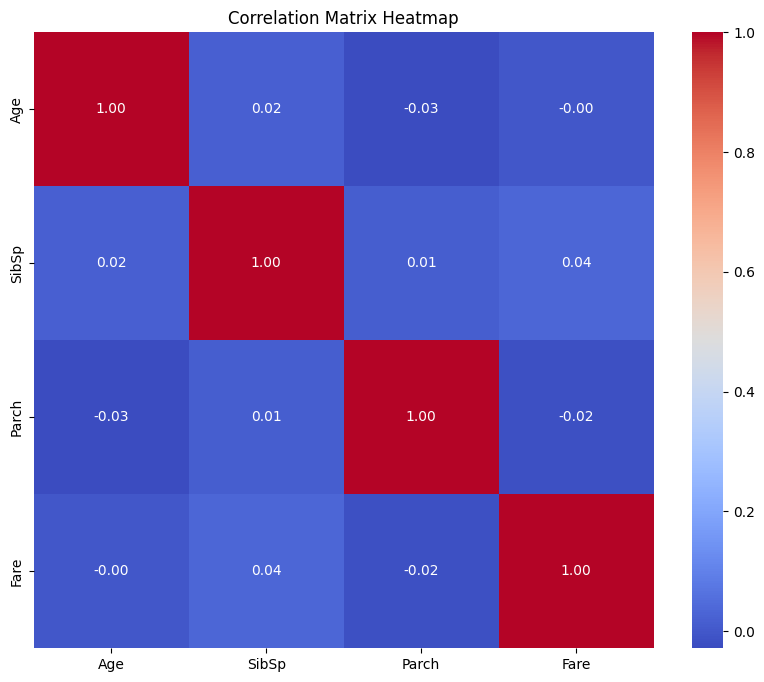

In [52]:
#Heatmap: To Visualize Correlation Matrix
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

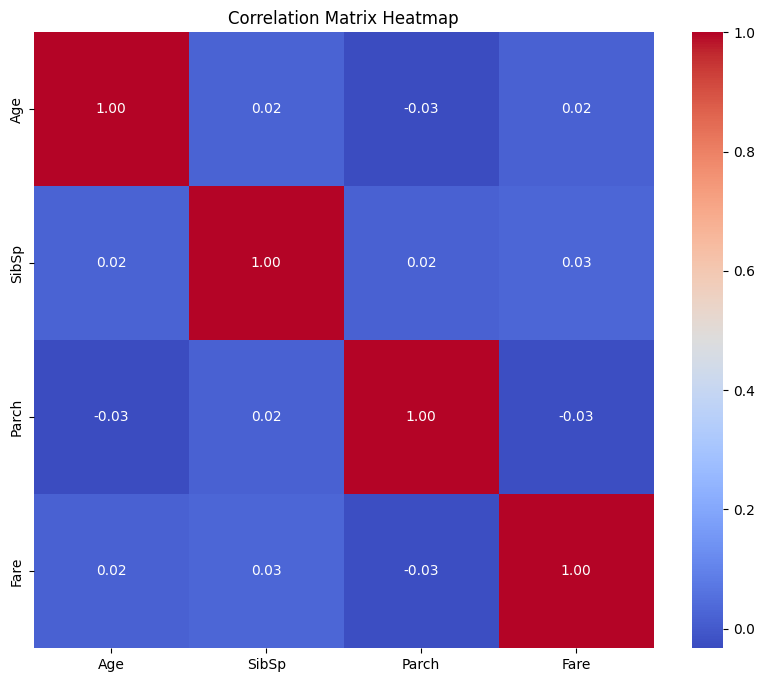

In [53]:
#Heatmap: To Visualize Correlation Matrix - BEFORE DATA CLEANING 
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

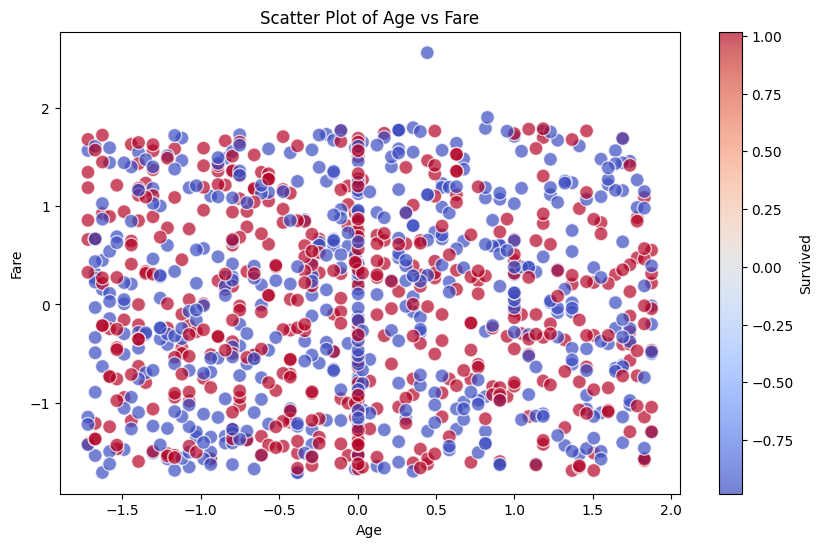

In [54]:
#Scatter Plot: Age vs Fare
import matplotlib.pyplot as plt

# Scatter plot: Age vs Fare
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Fare'], c=df_cleaned['Survived'], cmap='coolwarm', alpha=0.7, edgecolors='w', s=100)
plt.colorbar(label='Survived')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

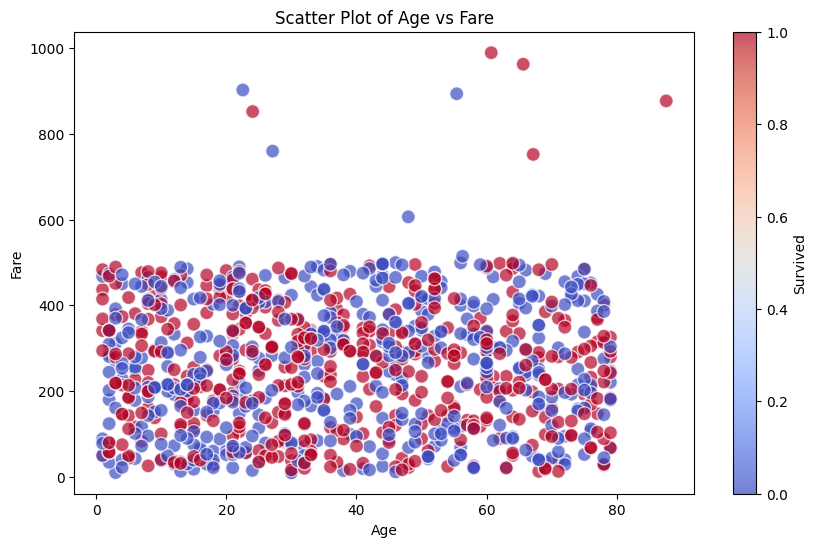

In [55]:
#Scatter Plot: Age vs Fare - BEFORE DATA CLEANING
import matplotlib.pyplot as plt

# Scatter plot: Age vs Fare
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.7, edgecolors='w', s=100)
plt.colorbar(label='Survived')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

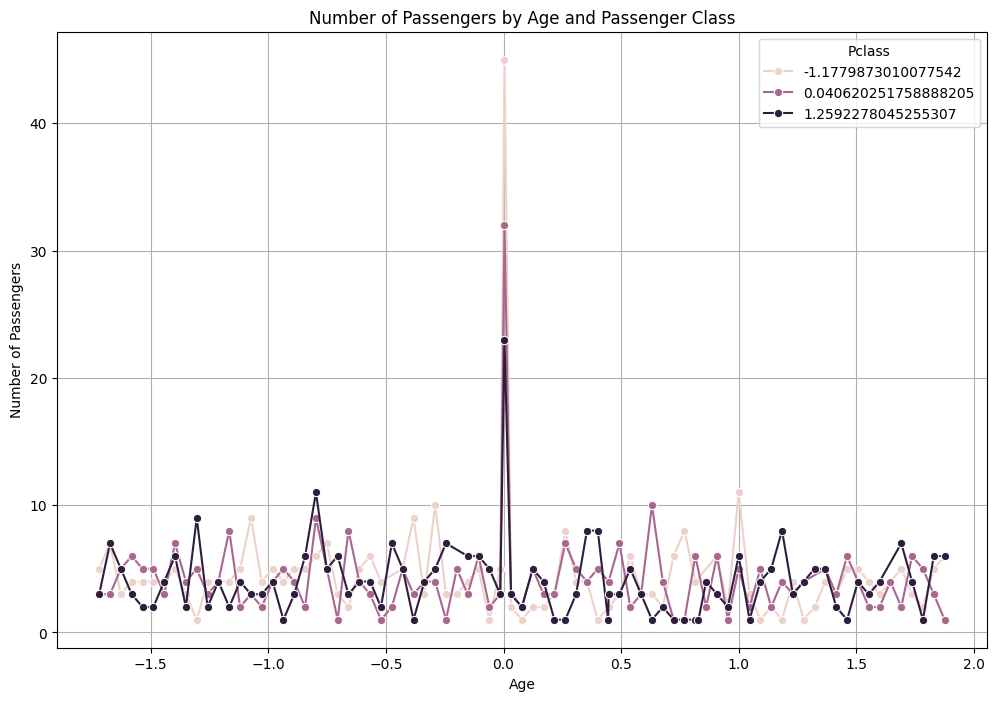

In [56]:
#Line Plot: Number of Passengers Over Age (Grouped by Class)
# Calculate the number of passengers by Age and Pclass
age_pclass_counts = df_cleaned.groupby(['Age', 'Pclass']).size().reset_index(name='Count')

# Line plot: Number of Passengers by Age and Pclass
plt.figure(figsize=(12, 8))
sns.lineplot(data=age_pclass_counts, x='Age', y='Count', hue='Pclass', marker='o')
plt.title('Number of Passengers by Age and Passenger Class')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.grid(True)
plt.show()

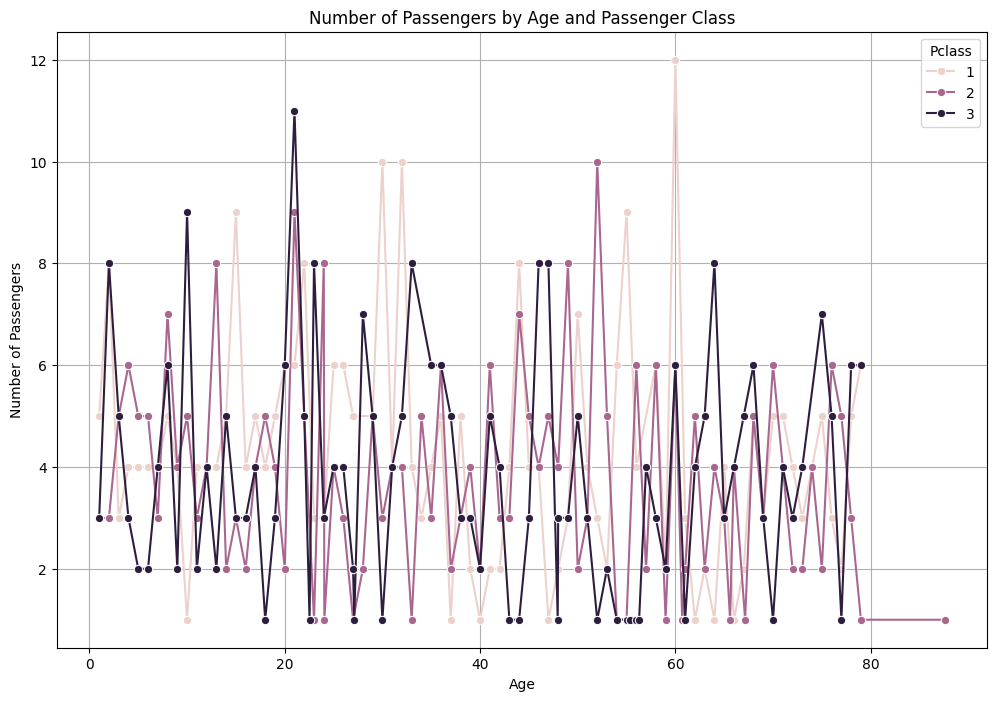

In [58]:
#Line Plot: Number of Passengers Over Age (Grouped by Class) - BEFORE DATA CLEANING
# Calculate the number of passengers by Age and Pclass
age_pclass_counts = df.groupby(['Age', 'Pclass']).size().reset_index(name='Count')

# Line plot: Number of Passengers by Age and Pclass
plt.figure(figsize=(12, 8))
sns.lineplot(data=age_pclass_counts, x='Age', y='Count', hue='Pclass', marker='o')
plt.title('Number of Passengers by Age and Passenger Class')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.grid(True)
plt.show()